# Capstone Project Module 2 Purwadhika School : Data Analysis


# Context
An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

# Data
* ID: ID number of customers.
* Warehouse block: The company has a big warehouse that is divided into blocks (A-E).
* Mode of shipment: The company ships the products in multiple ways (Ship, Flight, and
Road).
* Customer care calls: The number of calls made from inquiries for inquiries of the
shipment.
* Customer rating: Rate from each customer. 1 is the lowest, and 5 is the highest.
* Cost of the product: Cost of the product in US Dollars.
* Prior purchases: The number of previous purchases.
* Product importance: The company has categorized the product in various parameters
(low, medium, high).
* Gender: Male and female.
* Discount offered: Discount offered on that specific product.
* Weight in gms: The weight in grams.
* Reached on time: 1 indicates that the product has not arrived on time, and 0 indicates the
product has arrived on time.

# Pertanyaan
1. Blok mana yang mempunyai frekuensi order paling besar?
2. Blok Warehouse mana yang yang paling banyak mempunyai masalah terkait pengiriman?
3. Berapa rata-rata rating yang diberikan oleh keseluruhan customer?
4. Apakah jenis pengiriman berpengaruh terhadap ketepatan waktu pengiriman produk?

# Libraries

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, chi2_contingency


# Data Overview

In [189]:
df = pd.read_csv(r'/Users/mbismas/Downloads/Online Retail Shipping.csv')
df 

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [190]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [192]:
print('Online Retail dataset mempunyai',df.shape,'baris dan kolom')

Online Retail dataset mempunyai (10999, 12) baris dan kolom


Dari df.info dan df.shape di atas, didapatkan bahwa:
1. Ada total 10999 baris dan 12 kolom dalam dataset Online Retail Shipping
2. Tidak ada missing values pada setiap kolom
3. Semua kolom yang mempunyai tipe data string (Warehouse_block, Mode_of_Shipment, Product_importance, Gender) mempunyai tipe data yg sudah benar
4. Semua kolom yang mempunyai tipe data integer (ID, Customer_care_calls, Customer_rating, Prior purchases, Discount_offered, Weight_in_gms, Reached.on.Time) mempunyai tipe data yang sudah benar

In [193]:
nums = ['Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Discount_offered', 'Cost_of_the_Product', 'Weight_in_gms', 'Reached.on.Time_Y.N']
cats = ['Mode_of_Shipment', 'Product_importance', 'Gender','Warehouse_block']

In [194]:
df[nums].describe()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Cost_of_the_Product,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,3.567597,13.373216,210.196836,3634.016729,0.596691
std,1.141490,1.413603,1.522860,16.205527,48.063272,1635.377251,0.490584
min,2.000000,1.000000,2.000000,1.000000,96.000000,1001.000000,0.000000
25%,3.000000,2.000000,3.000000,4.000000,169.000000,1839.500000,0.000000
50%,4.000000,3.000000,3.000000,7.000000,214.000000,4149.000000,1.000000
75%,5.000000,4.000000,4.000000,10.000000,251.000000,5050.000000,1.000000
max,7.000000,5.000000,10.000000,65.000000,310.000000,7846.000000,1.000000


In [195]:
df[cats].describe()

,Mode_of_Shipment,Product_importance,Gender,Warehouse_block
count,10999,10999,10999,10999
unique,3,3,2,5
top,Ship,low,F,F
freq,7462,5297,5545,3666


In [196]:
data_clean = df.copy()
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


# Data Cleansing

**Missing Values**

In [197]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Tidak ada missing values yang harus ditangani

**Duplicate Data**

In [198]:
df.duplicated().sum()

0

Tidak ada duplikat data yang harus ditangani

**Outlier**

In [215]:
df2 = df.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(df2)}')

filtered_entries1 = np.array([True] * len(df2))

for col in nums:
    zscore = abs(stats.zscore(df2[col])) # hitung absolute z-scorenya
    filtered_entries1 = (zscore < 3) & filtered_entries1 # keep yang kurang dari 3 absolute z-scorenya
    
df2 = df2[filtered_entries1] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df2)}')

Jumlah baris sebelum memfilter outlier: 10999
Jumlah baris setelah memfilter outlier: 10642


Menggunakan z-score membuang 3% dari data outlier sehingga data berjumlah 10642. Karena saya berpikir bahwa setiap data itu berharga, maka saya menggunakan z-score agar data tidak terbuang banyak

**Data Preparing**

In [216]:
df2=df2.drop("ID",axis=1 )

In [217]:
df2.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [218]:
Warehouse_block = df2["Warehouse_block"].value_counts()
Warehouse_block

F    3539
B    1778
D    1777
A    1777
C    1771
Name: Warehouse_block, dtype: int64

In [219]:
df2["Reached.on.Time_Y.N"].value_counts()

1    6282
0    4360
Name: Reached.on.Time_Y.N, dtype: int64

In [220]:
df2_c = df2.copy()
df2_c['Reached.on.Time_Y.N'] = df2_c['Reached.on.Time_Y.N'].where(df2_c['Reached.on.Time_Y.N'] > 0,'yes')
df2_c['Reached.on.Time_Y.N'] = df2_c['Reached.on.Time_Y.N'].where(df2_c['Reached.on.Time_Y.N'] == 'yes','no')
df2_c

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,no
1,F,Flight,4,5,216,2,low,M,59,3088,no
2,A,Flight,2,2,183,4,low,M,48,3374,no
3,B,Flight,3,3,176,4,medium,M,10,1177,no
4,C,Flight,2,2,184,3,medium,F,46,2484,no
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,no
10995,B,Ship,4,1,232,5,medium,F,6,1247,yes
10996,C,Ship,5,4,242,5,low,F,4,1155,yes
10997,F,Ship,5,2,223,6,medium,M,2,1210,yes


In [221]:
df2_c = df2_c.rename(columns = {'Reached.on.Time_Y.N':'Reached_on_time'})

In [222]:
catogary_1= ['Warehouse_block', 'Mode_of_Shipment','Customer_rating','Prior_purchases',
       'Product_importance', 'Gender','Reached_on_time']
catogary_2 =['Discount_offered', 'Weight_in_gms']
catogary_3 =['Cost_of_the_Product','Reached_on_time']

**Data Visualization**

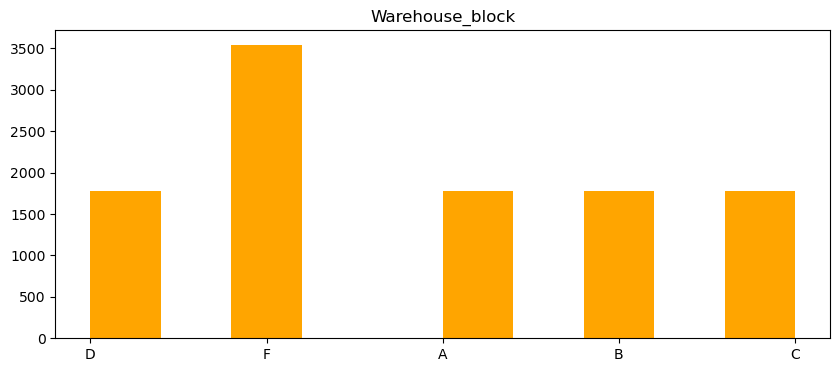

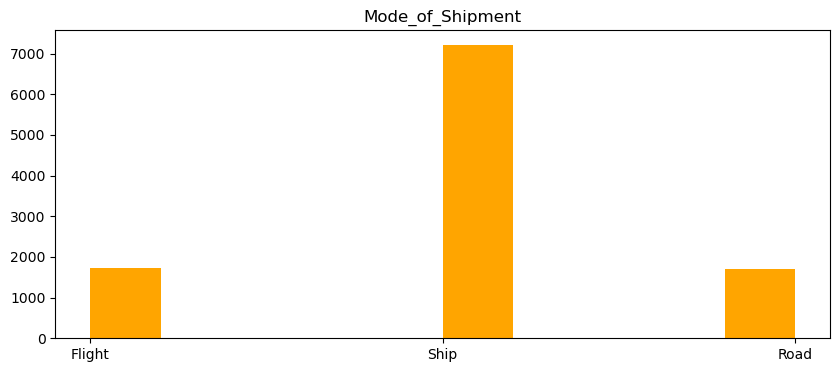

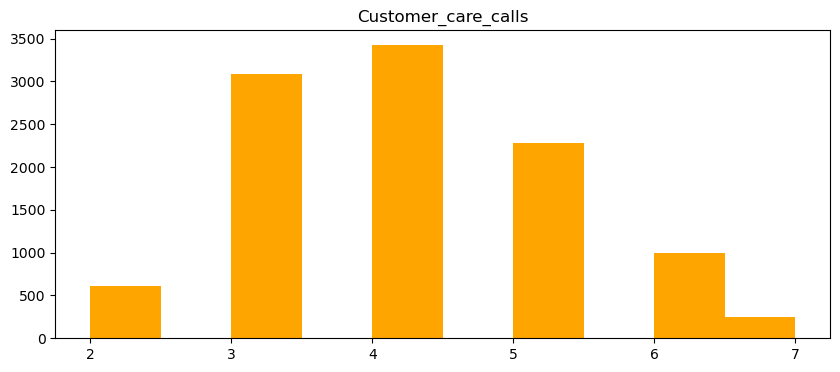

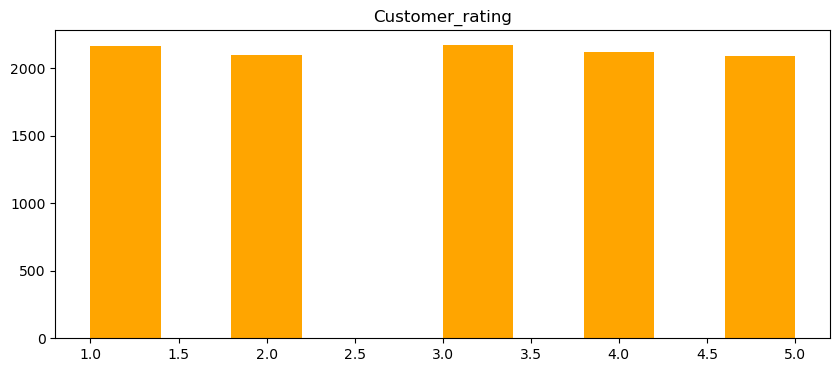

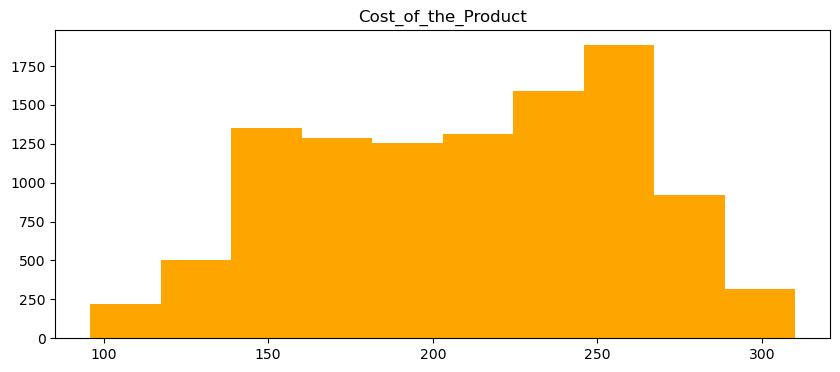

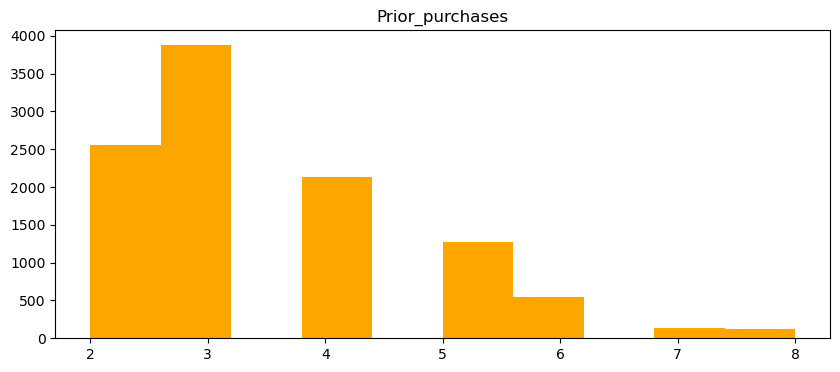

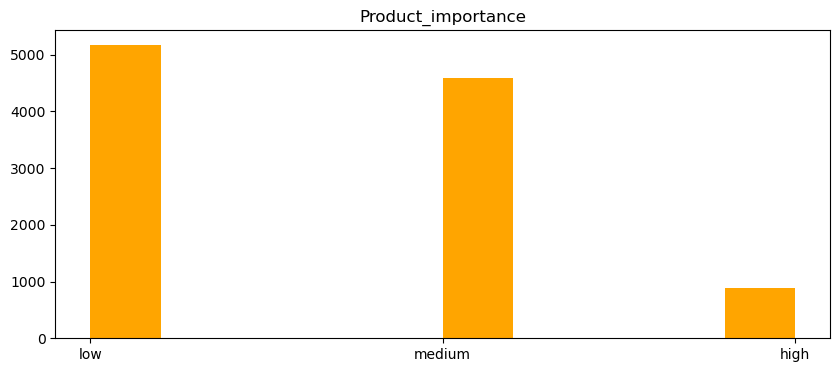

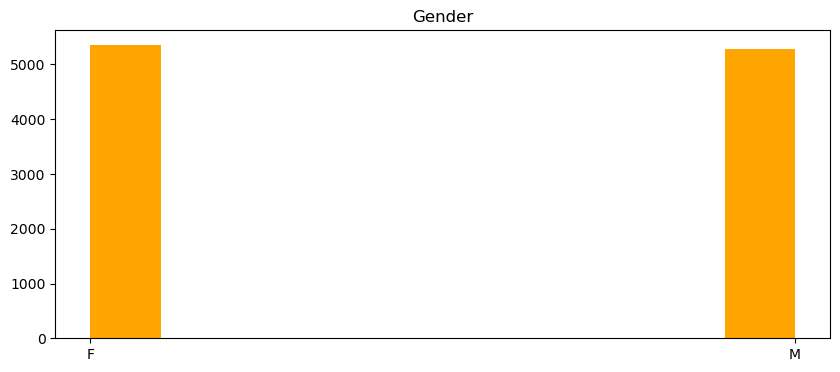

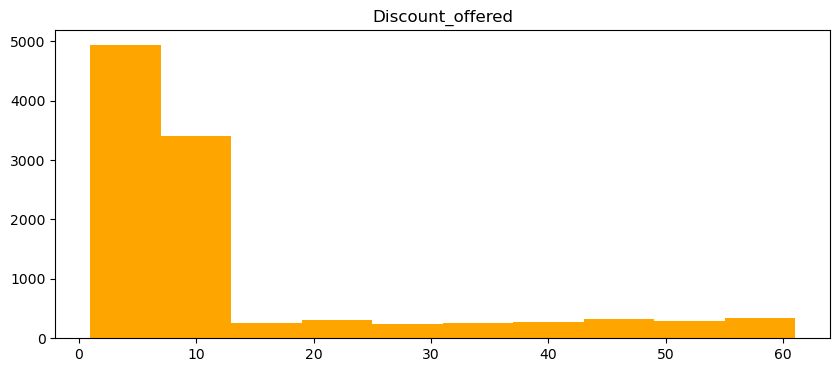

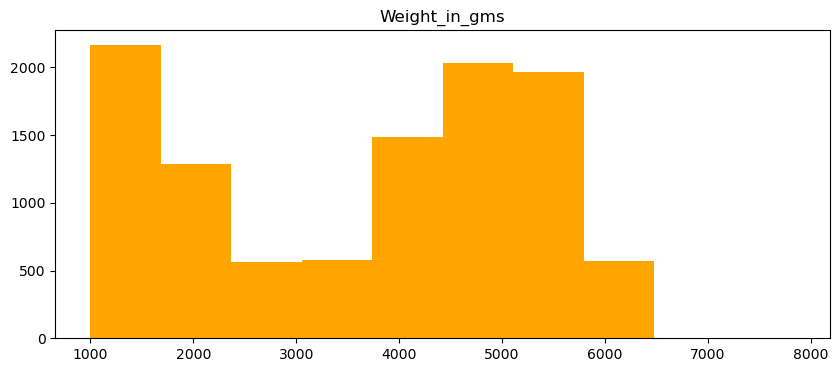

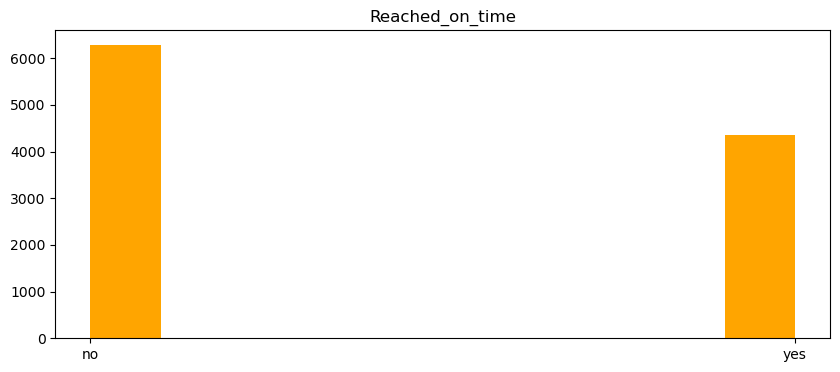

In [223]:
for i in df2_c.columns :
    plt.figure(figsize=(10, 4)) 
    plt.title(i)
    plt.hist(df2_c[i],color="orange")
    plt.show()

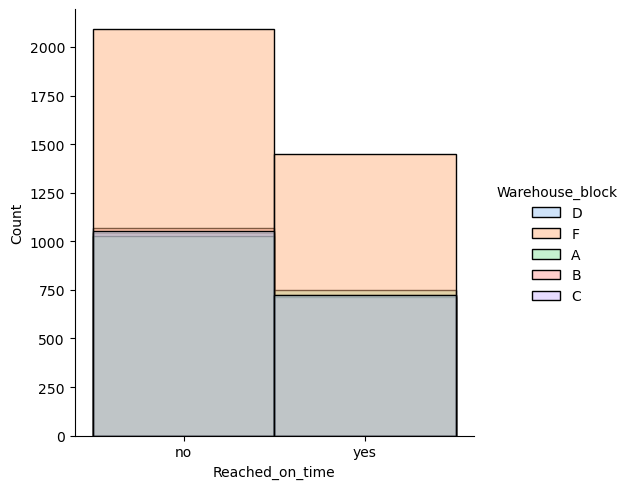

In [224]:
sns.displot(
    data = df2_c,
    x = 'Reached_on_time',
    hue = 'Warehouse_block',
    palette = 'pastel'
)

Bisa dilihat bahwa blok F mempunyai tingkat keterlambatan produk yang sangat tinggi

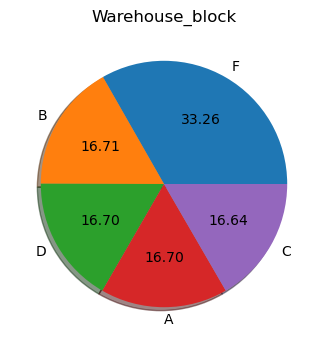

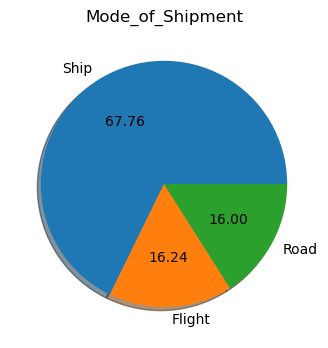

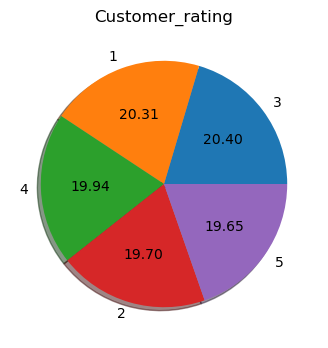

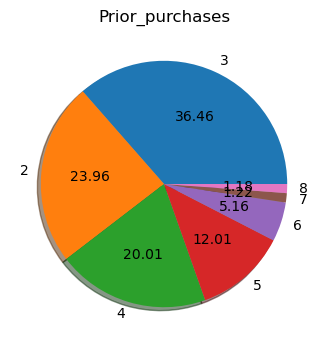

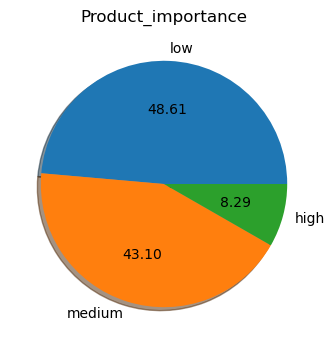

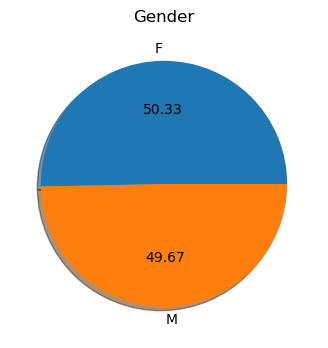

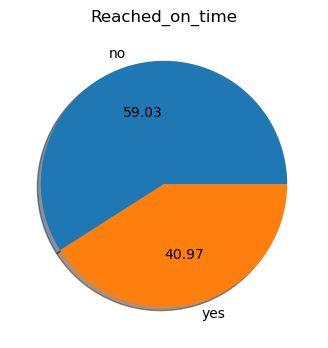

In [225]:
for i in catogary_1 :
    x=df2_c[i].value_counts()
    y= x.index
    plt.figure(figsize=(10, 4)) 
    plt.title(i)
    plt.pie(x,labels=y
       ,shadow=True
       ,autopct="%.2F")
    plt.show()

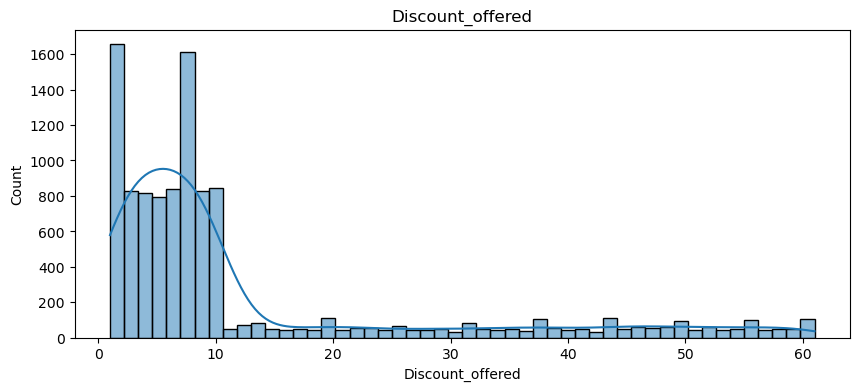

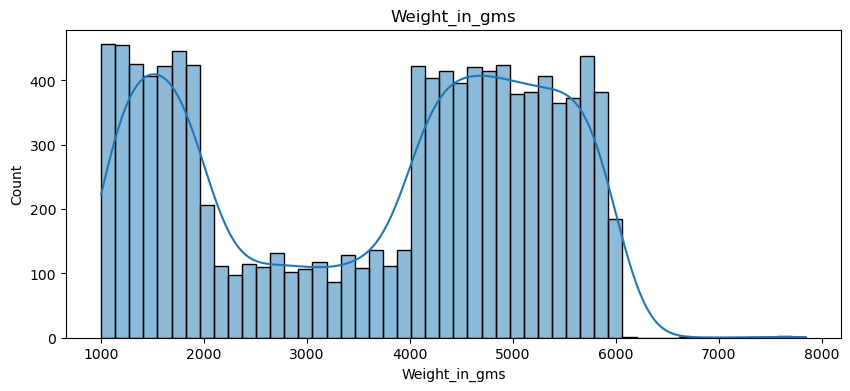

In [226]:
for i in catogary_2:
    plt.figure(figsize=(10, 4)) 
    plt.title(i)
    x=sns.histplot(df2_c[i],kde=True, bins = 50)
    plt.show() 

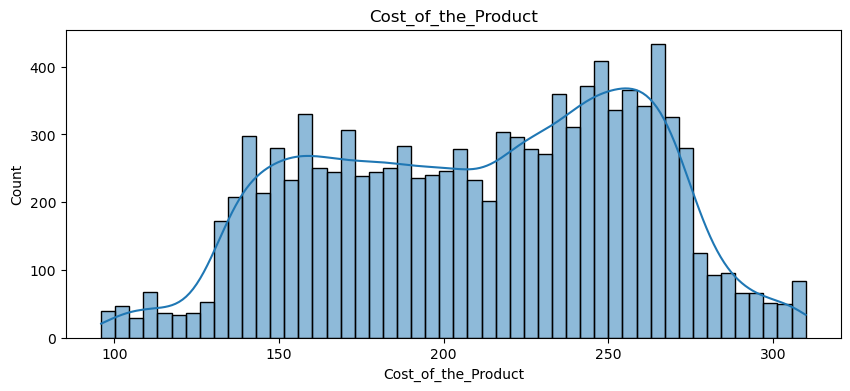

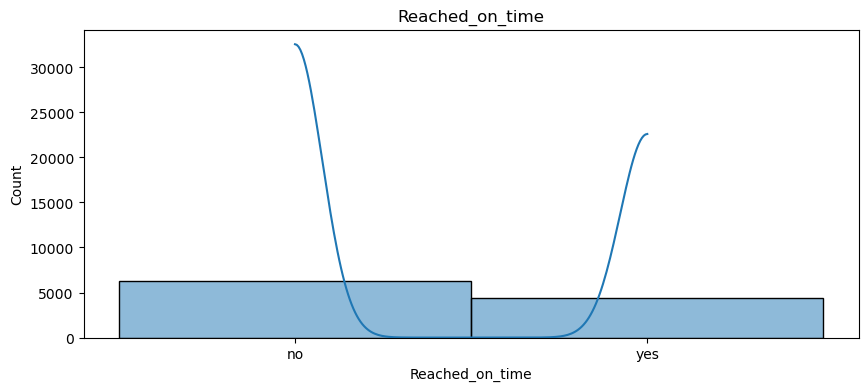

In [227]:
for i in catogary_3:
    plt.figure(figsize=(10, 4)) 
    plt.title(i)
    x=sns.histplot(df2_c[i],kde=True, bins = 50)
    plt.show() 

**Uji Hipotesis**

In [228]:
freqcount  = df2_c.value_counts(subset = ['Mode_of_Shipment','Reached_on_time'], sort = False).reset_index(name ='count')
freqcount = freqcount.pivot(index = 'Reached_on_time', columns = 'Mode_of_Shipment', values = 'count')
freqcount

Mode_of_Shipment,Flight,Road,Ship
Reached_on_time,,,
no,1032,992,4258
yes,696,711,2953


In [229]:
chi2 = freqcount.values.tolist()
chi2

[[1032, 992, 4258], [696, 711, 2953]]

In [230]:
stat, p , dof, expected = chi2_contingency(chi2)
alpha = 0.05
print('P-value is ' + str(p))
if p <= alpha:
    print('Dependent variable, reject H0')
else:
    print('Independent variable, H0 holds')

P-value is 0.6798841916887093
Independent variable, H0 holds


Hasil Chi Square test menunjukan bahwa jenis pengiriman dan status pengiriman/ketepatan waktu pengiriman adalah independent variables, jadi tidak ada hubungan antara kedua variable. (Tidak ada pengaruh antara jenis pengiriman terhadap ketepatan waktu pengiriman produk)

**Conclusion**
1. Blok Warehouse yang mempunyai jumlah order sangat banyak yaitu Blok F
2. Blok F adalah blok yang mempunyai keterlambatan pengiriman produk sangat tinggi
3. Rata-rata rating yang diberikan oleh keseluruhan customer adalah 2.9 dari 1 - 5
4. Tidak ada hubungan atau pengaruh jenis pengiriman terhadap ketepatan waktu pengiriman produk, karena keduanya adalah independent variables